In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import vgg16, resnet50, inception_v3
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import tensorflow as tf

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Directory containing images
image_directory = '/content/drive/MyDrive/pretrained-model-image'

# Settings for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Initialize models
vgg_model = vgg16.VGG16(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')

1/1 [==============================] - 0s 235ms/step


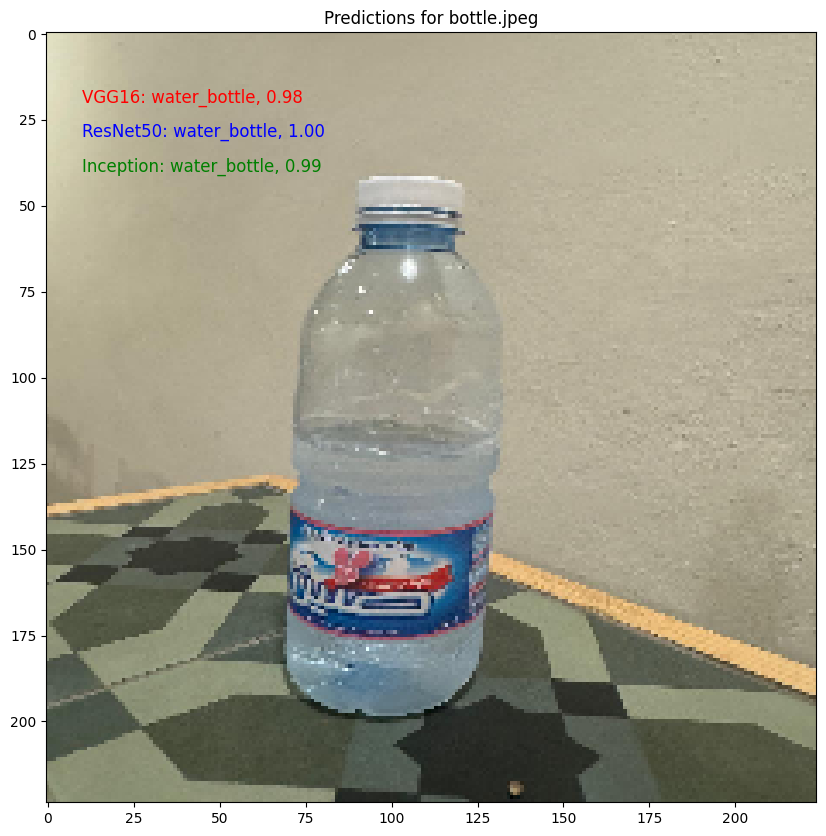

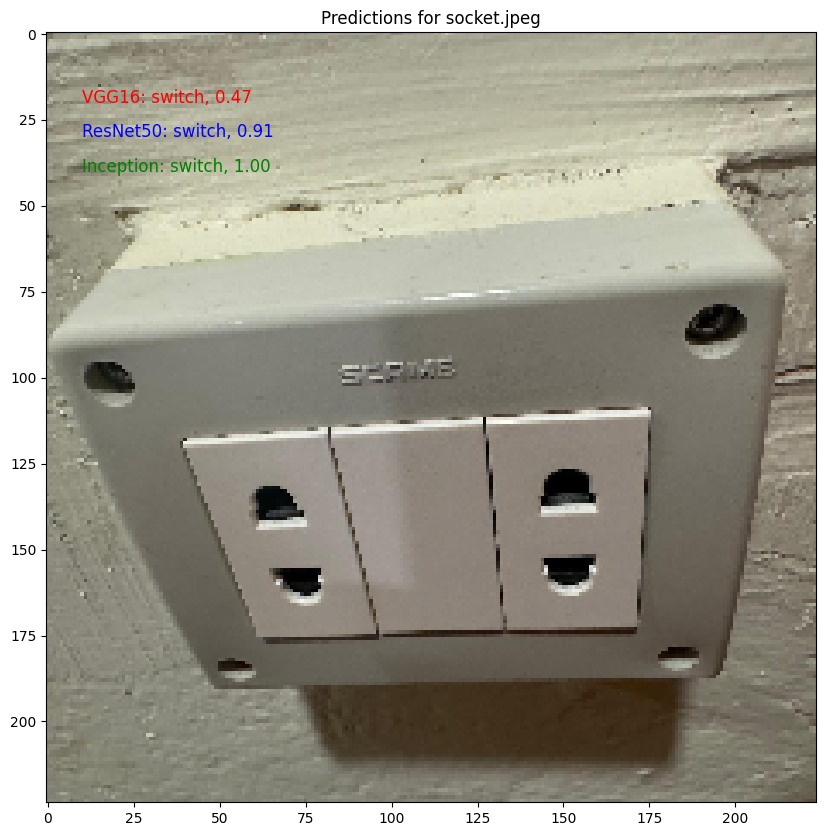

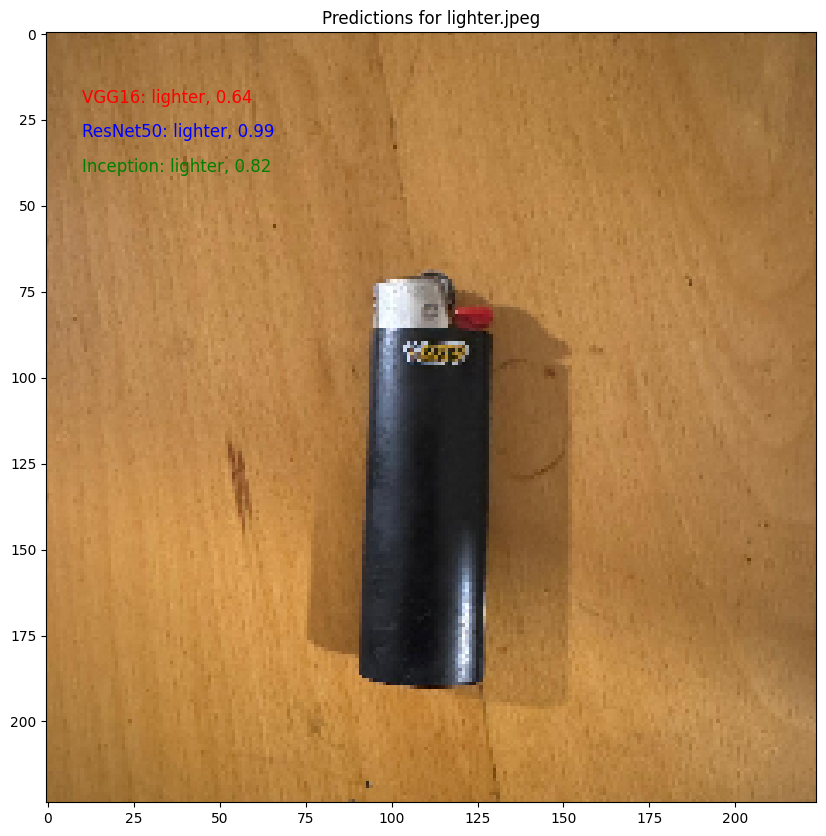

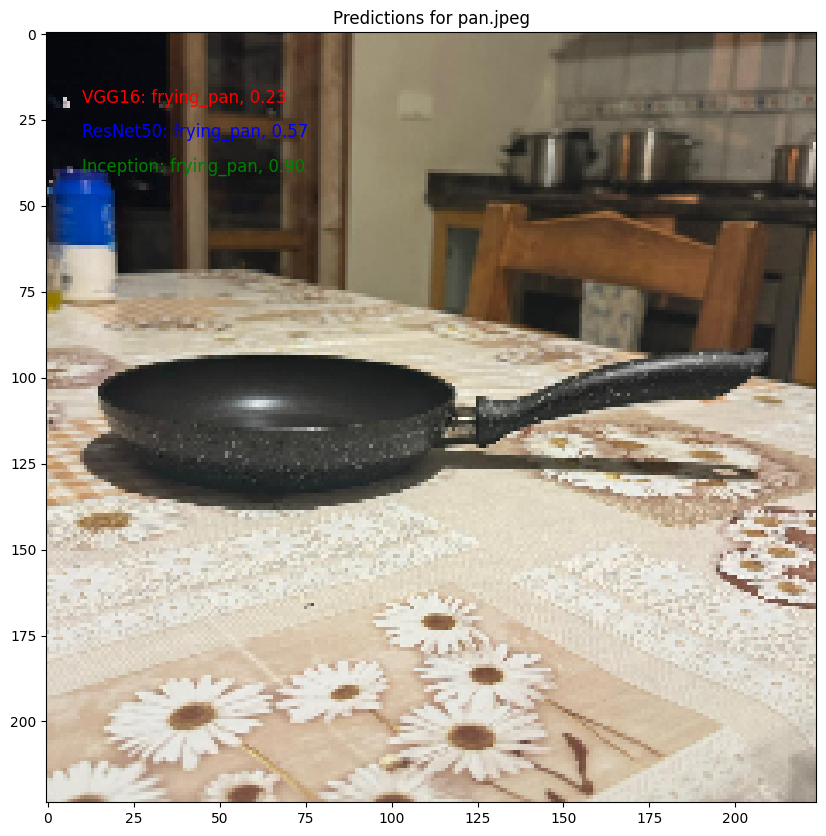

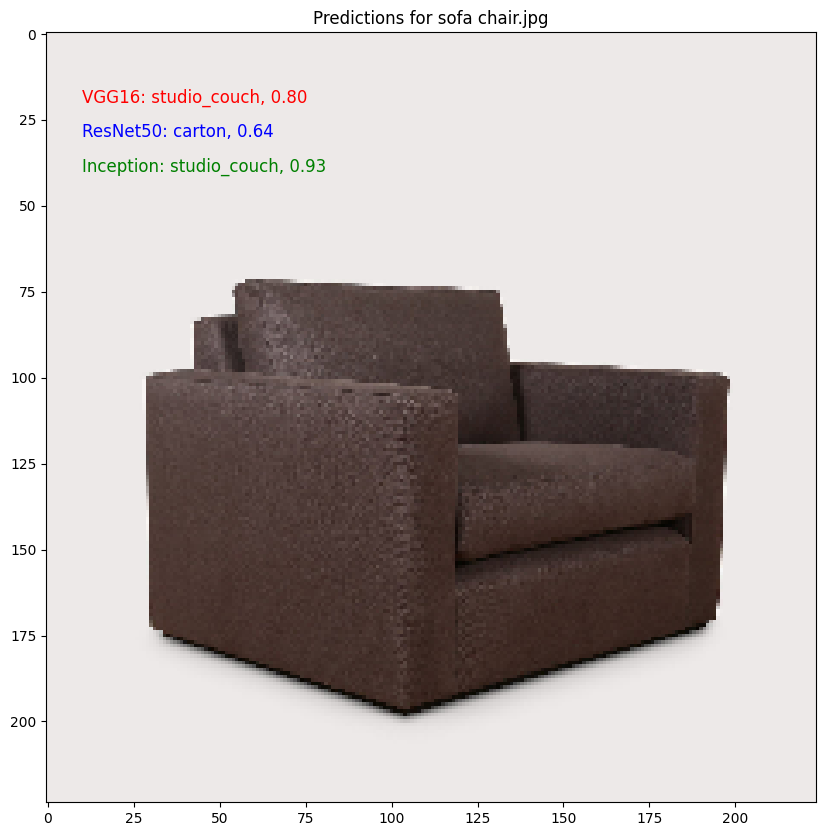

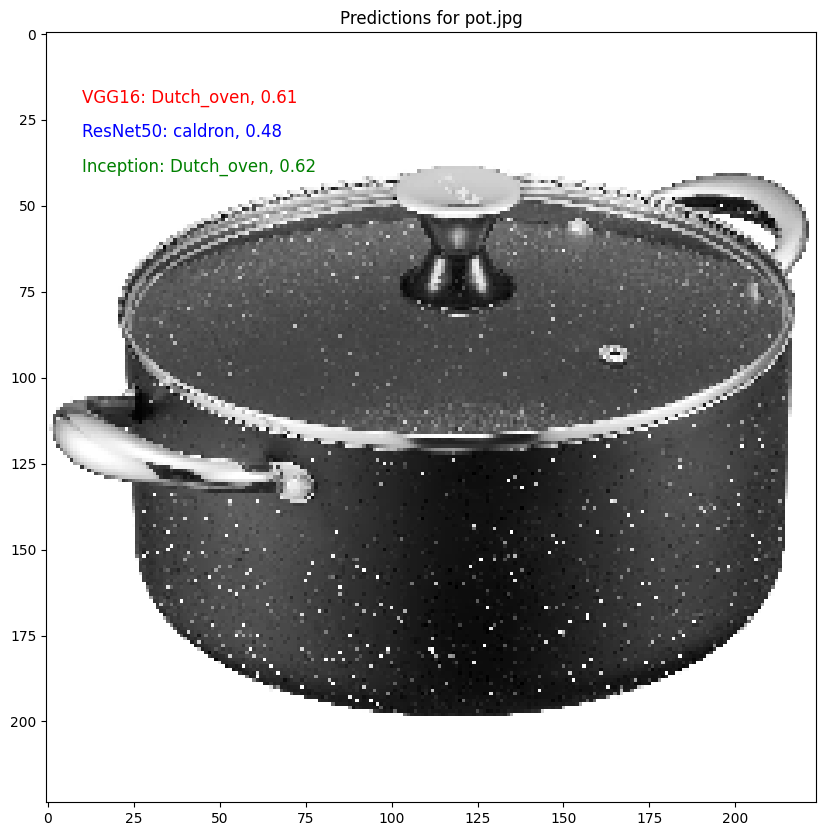

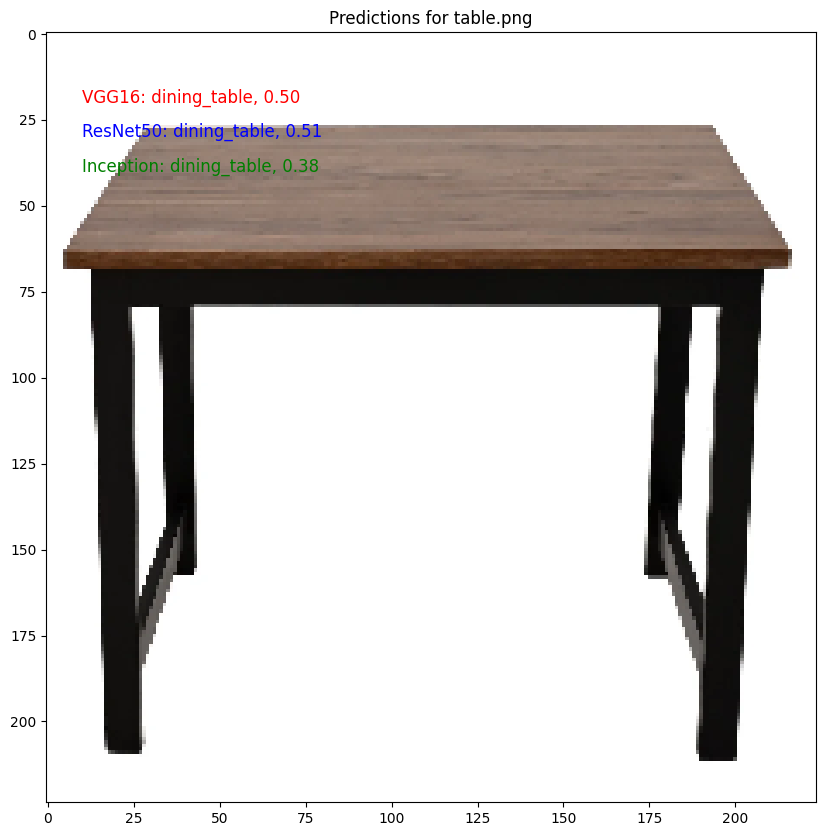

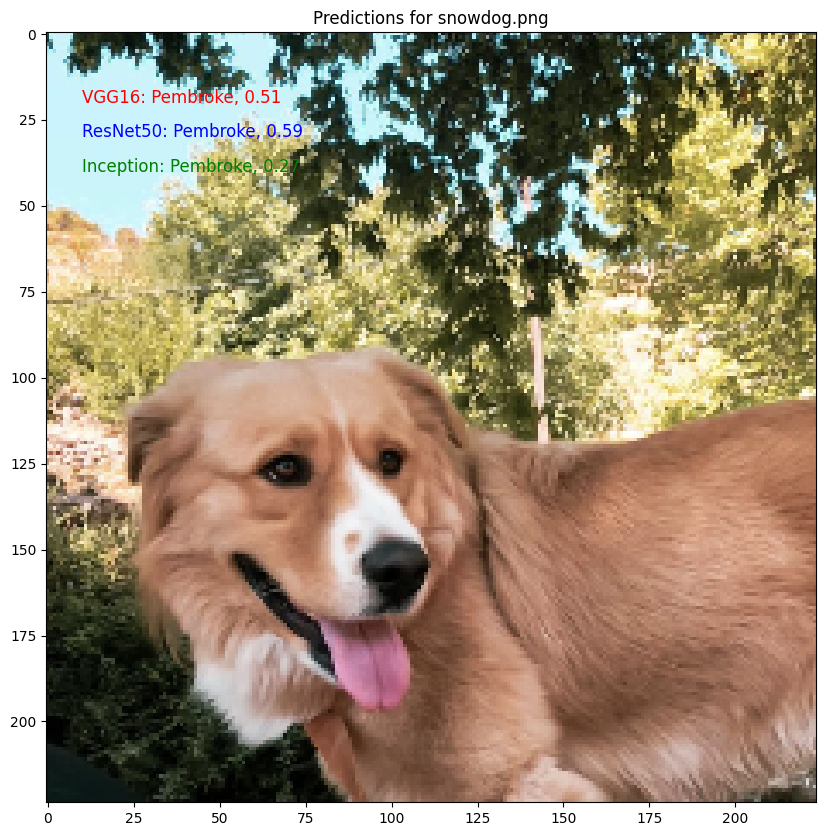

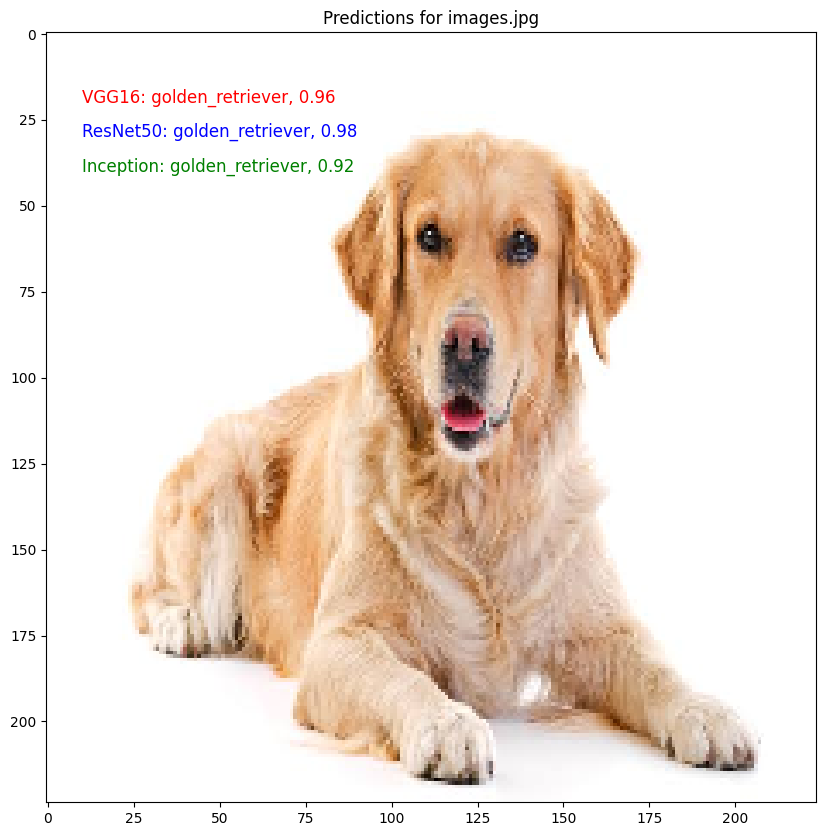

In [ ]:
for filename in os.listdir(image_directory):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(image_directory, filename)
        original = load_img(file_path, target_size=(224, 224))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)

        # VGG16 Model
        processed_image = vgg16.preprocess_input(image_batch.copy())
        predictions = vgg_model.predict(processed_image)
        label_vgg = decode_predictions(predictions)

        # ResNet50 Model
        processed_image = resnet50.preprocess_input(image_batch.copy())
        predictions = resnet_model.predict(processed_image)
        label_resnet = decode_predictions(predictions, top=3)

        # Inception V3 Model (requires a different input size)
        original_inception = load_img(file_path, target_size=(299, 299))
        numpy_image_inception = img_to_array(original_inception)
        image_batch_inception = np.expand_dims(numpy_image_inception, axis=0)
        processed_image_inception = inception_v3.preprocess_input(image_batch_inception.copy())
        predictions_inception = inception_model.predict(processed_image_inception)
        label_inception = decode_predictions(predictions_inception)

        # Display the image with predictions using Matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(original)
        plt.title(f"Predictions for {filename}")
        plt.text(10, 20, f"VGG16: {label_vgg[0][0][1]}, {label_vgg[0][0][2]:.2f}", fontsize=12, color='red')
        plt.text(10, 30, f"ResNet50: {label_resnet[0][0][1]}, {label_resnet[0][0][2]:.2f}", fontsize=12, color='blue')
        plt.text(10, 40, f"Inception: {label_inception[0][0][1]}, {label_inception[0][0][2]:.2f}", fontsize=12, color='green')
